# Exploratory Data Analysis for 'koopPrijs'

This project is executed for the course of AI for Business, at the Amsterdam School of Applied Sciences in 2022. The purpose of the research is to to build and evaluate machine learning approaches to predict the price of a  house and the time to sale of a house. The dataset that is used to train and evaluate the models is scraped from the Dutch housing website Funda. In this notebook, the data will be explored and prepared for the machine learning models. The project is conducted and combined by Pim Doosje (500800438) and Joel Zelle (500763451).

### Importing the dataset and libraries

In [37]:
# Importing libraries
import numpy as np
import pandas as pd
from datetime import date

# Visualisation
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Some additional libraries and plotting all code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from IPython.core.display import HTML 

In [38]:
# importing file and create a dataframe
df_original = pd.read_csv('housing_topic_modelling.csv')
# Show first 5 rows
df_original.head()

,Unnamed: 0,key_0,id,description,main_topic,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,...,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,0,4388064,4388064,"Ruimte, vrijheid, en altijd het water en de we...",Topic 10,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",...,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12
1,1,4388200,4388200,Verrassend ruime tussenwoning nabij het centru...,Topic 10,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,...,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30
2,2,4399344,4399344,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Topic 2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,...,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23
3,3,4400638,4400638,Wonen in een zeer royaal bemeten geschakelde 2...,Topic 3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,...,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14
4,4,4401765,4401765,Landgoed Junne is een eeuwenoud landgoed en li...,Topic 6,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,...,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06


In [39]:
# Create a copy to work in
df = df_original.copy()

### Taking a look at the data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211617 entries, 0 to 211616
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             211617 non-null  int64  
 1   key_0                  211617 non-null  int64  
 2   id                     211617 non-null  int64  
 3   description            211617 non-null  object 
 4   main_topic             211617 non-null  object 
 5   globalId               211617 non-null  int64  
 6   publicatieDatum        211617 non-null  object 
 7   postcode               211617 non-null  object 
 8   koopPrijs              210876 non-null  float64
 9   volledigeOmschrijving  211617 non-null  object 
 10  soortWoning            211617 non-null  object 
 11  categorieObject        211617 non-null  object 
 12  bouwjaar               211617 non-null  object 
 13  indTuin                211617 non-null  int64  
 14  perceelOppervlakte     144376 non-nu

In [41]:
# Printing out the amount of rows and columns, and storing the original amount in variable
funda_df_allrows = df.shape[0]
funda_df_allcolumns = df.shape[1]
print("There are {} rows and {} columns in the dataset".format(df.shape[0], df.shape[1]))

There are 211617 rows and 22 columns in the dataset


The df.info function is used to give an overview of all independent variables, which are the columns in the data frame. Per variable, the number of null values is noted and the amount of data type. The number of null values is important because null values have a negative impact on the reliability of the model. From this table it can be concluded that:
- Energy label has 88.863 non null values
- Surface area has 144.376 non null values
- Number of bathrooms has 150.469 non null values
- Purchase price has 210.876 non null values
- The other 17 variables have no null values

We have decided to drop the energy label, surface area and number of bathrooms because these variables show a high frequency of null values. Another solution to dealing with null values is replacing these values with for example the average value of that variable. We have decided to drop the columns because there are enough other variables to create our machine learning models.


In [42]:
# Drop columns without use for this project and columns that do not have data for all columns/variables
# Columns 'aantalBadkamers' and 'energielabelKlasse' are dropped because they contain too many NaN values.
df = df.drop(['globalId', 'kantoor_naam_MD5hash', 'globalId.1', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse', 'key_0', 'id', 'description', 'volledigeOmschrijving' ], 1)

# Drop rows with empty values (at the purchasing price)
df = df.dropna()


C:\Users\pimdo\AppData\Local\Temp/ipykernel_2364/3003168237.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['globalId', 'kantoor_naam_MD5hash', 'globalId.1', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse', 'key_0', 'id', 'description', 'volledigeOmschrijving' ], 1)


### Preparing the data for the ML models

1.  Preparing and calculating the time to sell

In [43]:
# Change the data types into date, so these can be calculated with
df["publicatieDatum"] = pd.to_datetime(df["publicatieDatum"]).dt.date
df["datum_ondertekening"] = pd.to_datetime(df["datum_ondertekening"]).dt.date

# defining a new time to sell column, to calculate the difference between posting and selling date. This results in the days to sale
df['Time_to_sell'] = (df['datum_ondertekening'] - df['publicatieDatum']).dt.days

# Time to sell needs to be changed into int64
columns = ['Time_to_sell']
for col in columns:
    df[col] = df[col].astype('int64')
    
# Removing the instances where the selling date in before the posting date (this mistake is made on the Funda webpage)
df = df.drop(df[df.Time_to_sell < 1].index)


2. Grouping the type of houses together to keep a managing amount of variables when dummifying


In [44]:
# fixing soortwoning column

def clean_soortwoning(x):
    if "vrijstaande" in x: 
        return "vrijstaande_woning"
    if "appartement" in x:
        return "appartement"
    if "portiekflat" in x:
        return "portiekflat"
    if "eengezinswoning" in x:
        return "eengezinswoning"
    if "herenhuis" in x:
        return "herenhuis"
    if "bovenwoning" in x:
        return "bovenwoning"
    if "benedenwoning" in x:
        return "benedenwoning"
    else: 
        return "other"

df["soortWoning_cleaned"] = df["soortWoning"].apply(clean_soortwoning)

3. Preparing the zipcode by removing the letters from the zip code


In [45]:
df['postcode']=df['postcode'].str[0:4]
postcode_df= df[["postcode"]]

#adding the postcode_index column
postcode_df["postcode_index"]= [x for x in range(postcode_df.shape[0])]
df["postcode_prepared"] = postcode_df["postcode_index"]
postcode_df


C:\Users\pimdo\AppData\Local\Temp/ipykernel_2364/2346335774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcode_df["postcode_index"]= [x for x in range(postcode_df.shape[0])]


,postcode,postcode_index
0,1774,0
2,1068,1
3,5628,2
4,7731,3
5,5971,4
...,...,...
211612,9791,205679
211613,6431,205680
211614,4051,205681
211615,4043,205682


4. Preparing the building year columns by only selecting the first four digits and dropping values that can not be used for analysis

In [46]:
#getting only first 4 digits in bouwjaar column 
df['bouwjaar']=df['bouwjaar'].str[0:4]

In [47]:
# Drop Vo and Na values from bouwjaar, these are mistakes in the dataset
df= df.drop(df[df.bouwjaar == '<{Vo'].index)
df= df.drop(df[df.bouwjaar == '<{Na'].index)

In [48]:
#Change bouwjaar type to int64
columns = ['bouwjaar']
for col in columns:
    df[col] = df[col].astype('int64')

5. Removing the final columns that will not be used for analysis


In [49]:
# Dropping old columns that are converted
df = df.drop(['publicatieDatum', 'postcode', 'soortWoning', 'categorieObject', 'datum_ondertekening' ], 1)


C:\Users\pimdo\AppData\Local\Temp/ipykernel_2364/1140287596.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['publicatieDatum', 'postcode', 'soortWoning', 'categorieObject', 'datum_ondertekening' ], 1)


In [50]:
# Showing the final result
df.head()

,Unnamed: 0,main_topic,koopPrijs,bouwjaar,indTuin,aantalKamers,oppervlakte,Time_to_sell,soortWoning_cleaned,postcode_prepared
0,0,Topic 10,139000.0,1971,1,3,62,104,vrijstaande_woning,0
2,2,Topic 2,267500.0,2001,0,3,70,113,appartement,1
3,3,Topic 3,349000.0,1973,1,5,144,132,eengezinswoning,2
4,4,Topic 6,495000.0,1900,0,8,323,123,vrijstaande_woning,3
5,5,Topic 9,162500.0,1970,1,4,68,243,eengezinswoning,4


6. Exporting the prepared dataset to a CSV file


In [51]:
# Save changes to a CSV format that can easily be imported in the ML notebook
df.to_csv('prepared_df2.csv')

## Data insights

<Figure size 540x252 with 0 Axes>

<AxesSubplot:>

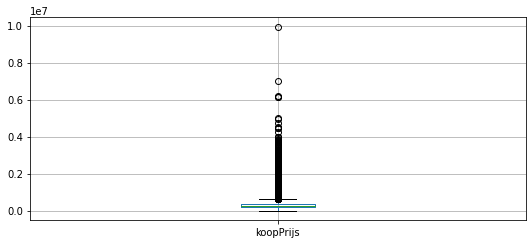

In [52]:
# Boxplot for koopPrijs
plt.figure()

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df.boxplot(['koopPrijs'])

The boxplot above shows that the vast majority of houses are between €0 and €750.000 (€0.75 *10^7). There are only outliers above +/-€0.75 *10^7 (€750.000).

<function matplotlib.pyplot.show(close=None, block=None)>

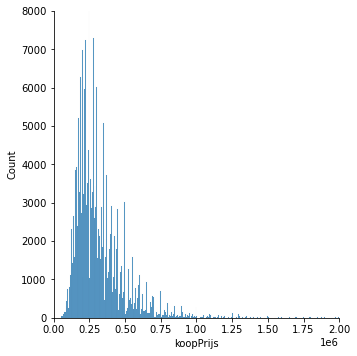

In [53]:
# Distribution graph of koopprijs
a_plot = sns.displot(df['koopPrijs'])
a_plot.set(xlim=(0.0, 2000000))
a_plot.set(ylim=(0, 8000))

plt.show

As can be seen above, most sold houses are in the lower price range. There are, however, several houses that have been sold for high prices (>2.000.000). These few outliers have been taken out of this graph, because of the few numbers and the ability to read the graph.

<Figure size 720x720 with 0 Axes>

heatmap with correlations of dataframe
AxesSubplot(0.0398698,0.0398698;0.756104x0.939575)


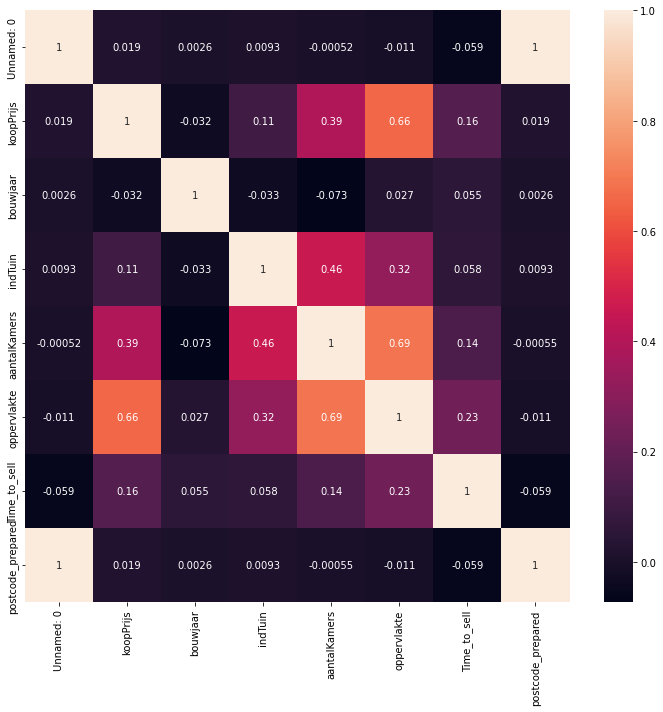

In [54]:
# Correlation heatmap
plt.figure(figsize = (10, 10))       
print('heatmap with correlations of dataframe')
print(sns.heatmap(df.corr(),annot = True))

In the correlation heatmap above can be seen that for koopPrijs there is a correlation of 0.66 with oppervlakte. Another average correlation is with the number of rooms: 0.39.

For Time_to_sell there are no strong correlation. The least weak correlations are with oppervlakte (0.23), koopprijs (0.16) and aantalKamers(0.14).

## Regression line oppervlakte & koopPrijs

Text(0.5, 0, 'oppervlakte')

Text(0, 0.5, 'koopPrijs')

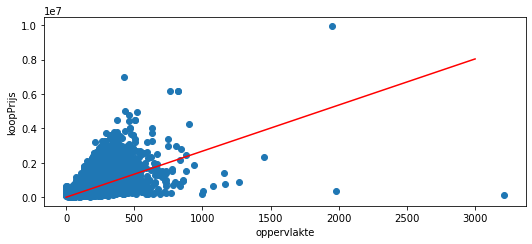

In [55]:

# Set columns to lists
opp = df.oppervlakte.to_list()
prijs = df.koopPrijs.to_list()       

# Calculating the mean 
average_opp = np.mean(df['oppervlakte'])
average_prijs = np.mean(df['koopPrijs'])

# Calculating B1 and B0
sum1 = 0
sum2 = 0
for i in range(len(opp)):
    sum1 = sum1 + ((opp[i] - average_opp)*(opp[i] - average_opp))
    sum2 = sum2 + ((prijs[i] - average_prijs)*(opp[i] - average_opp))
b1 = sum2/sum1
b0 = average_prijs - (b1 * average_opp)

# Plotting the linear regression line
x = np.linspace(0,3000,10)
y = b0 + (b1*x)
plt.plot(x,y,'r')
plt.scatter(opp, prijs)
plt.xlabel("oppervlakte")
plt.ylabel("koopPrijs")

The strongest correlation is between oppervlakte and koopPrijs. This relation and the regression line can be seen above in the scatter plot above.